In [1]:
import pandas as pd
import numpy as np
#! pip install lux-api
#import lux
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\Halloween\dataset\Train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\Halloween\dataset\test.csv")
submission = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\Halloween\dataset\sample_submission.csv")

In [3]:
train_c = train.copy()
test_c = test.copy()

In [4]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [6]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_id,6368,6368,CAGE6FYKMJNKDUE7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stall_no,6363.0,NaN,NaN,NaN,25.309445,14.32898,1.0,13.0,25.0,37.0,50.0
instock_date,6368,5350,2015-09-22 15:24:59.000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market_Category,6368.0,NaN,NaN,NaN,199.340609,170.27557,0.0,55.0,132.0,403.0,471.0
Customer_name,6157,5900,Kennedy,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loyalty_customer,6368,2,Yes,3887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,6368,10,Pet_care,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade,6368.0,NaN,NaN,NaN,0.643687,1.025092,0.0,0.0,0.0,2.0,3.0
Demand,6368.0,NaN,NaN,NaN,50.921168,29.091922,1.0,26.0,51.0,76.0,100.0
Discount_avail,6330.0,NaN,NaN,NaN,0.140442,0.347473,0.0,0.0,0.0,0.0,1.0


In [7]:
train.duplicated().sum()

0

In [8]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [9]:
train['Maximum_price'].value_counts()

3479.0     5
2978.0     5
6019.0     5
5803.0     5
3261.0     5
          ..
4521.0     1
1503.0     1
11640.0    1
7125.0     1
3896.0     1
Name: Maximum_price, Length: 4618, dtype: int64

In [10]:
train.drop(columns = 'Customer_name', inplace = True)

In [11]:
train.dropna(subset = ['Selling_Price'], inplace = True)

In [12]:
train.reset_index(drop = True, inplace = True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6327 non-null   object 
 1   Stall_no          6322 non-null   float64
 2   instock_date      6327 non-null   object 
 3   Market_Category   6327 non-null   int64  
 4   Loyalty_customer  6327 non-null   object 
 5   Product_Category  6327 non-null   object 
 6   Grade             6327 non-null   int64  
 7   Demand            6327 non-null   int64  
 8   Discount_avail    6290 non-null   float64
 9   charges_1         6129 non-null   float64
 10  charges_2 (%)     6123 non-null   float64
 11  Minimum_price     6289 non-null   float64
 12  Maximum_price     5986 non-null   float64
 13  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 692.1+ KB


In [14]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [15]:
train['Stall_no'].fillna(train['Stall_no'].mode()[0], inplace = True)

In [16]:
train['Discount_avail'].fillna(train['Discount_avail'].mode()[0], inplace = True)

In [17]:
train['charges_1'].fillna(train['charges_1'].mode()[0], inplace = True)

In [18]:
train['charges_2 (%)'].fillna(train['charges_2 (%)'].mode()[0], inplace = True)

In [19]:
train['Minimum_price'].fillna(train['Minimum_price'].mode()[1], inplace = True)

In [20]:
train['Maximum_price'].fillna(train['Maximum_price'].mode()[4], inplace = True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6327 non-null   object 
 1   Stall_no          6327 non-null   float64
 2   instock_date      6327 non-null   object 
 3   Market_Category   6327 non-null   int64  
 4   Loyalty_customer  6327 non-null   object 
 5   Product_Category  6327 non-null   object 
 6   Grade             6327 non-null   int64  
 7   Demand            6327 non-null   int64  
 8   Discount_avail    6327 non-null   float64
 9   charges_1         6327 non-null   float64
 10  charges_2 (%)     6327 non-null   float64
 11  Minimum_price     6327 non-null   float64
 12  Maximum_price     6327 non-null   float64
 13  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 692.1+ KB


In [22]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Stall_no,6327.0,25.308045,14.326489,1.00,13.00000,25.00000,37.000000,50.000000
Market_Category,6327.0,199.100205,170.306880,0.00,55.00000,131.00000,403.000000,471.000000
Grade,6327.0,0.644065,1.025477,0.00,0.00000,0.00000,2.000000,3.000000
Demand,6327.0,50.922554,29.090574,1.00,26.00000,51.00000,76.000000,100.000000
Discount_avail,6327.0,0.139245,0.346229,0.00,0.00000,0.00000,0.000000,1.000000
charges_1,6327.0,265.262526,122.612421,100.00,166.00000,255.00000,310.000000,649.000000
charges_2 (%),6327.0,10.276908,4.301050,1.00,7.00000,11.00000,14.000000,17.000000
Minimum_price,6327.0,3532.506085,2187.169707,1.00,1890.00000,3179.00000,4691.000000,17580.000000
Maximum_price,6327.0,6413.605500,3616.707249,404.00,4026.00000,5873.00000,7928.500000,58812.000000
Selling_Price,6327.0,4563.242592,2979.102408,-6062.47,2450.00528,4210.38464,6167.643252,22638.325941


In [23]:
train['instock_date'] = pd.to_datetime(train['instock_date'])

In [24]:
train['instock_year'] = train['instock_date'].dt.year

In [25]:
train['instock_month'] = train['instock_date'].dt.month

In [26]:
train['instock_day'] = train['instock_date'].dt.day

In [27]:
train.drop(columns = ['instock_date'], inplace = True)

In [28]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [29]:
train['Product_Category'] = encode.fit_transform(train['Product_Category'])

In [30]:
train['Loyalty_customer'] = encode.fit_transform(train['Loyalty_customer'])

In [31]:
train.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day
0,BRAE2NF6JA5GUEXG,37.0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,22
1,TUNE8SFB6RJN2HSD,38.0,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,27
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,18
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,28
4,JWSEBUKYQPMBZ3RK,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,29


In [32]:
train_num = train.select_dtypes(include = np.number)
train_num[0:2]

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_day
0,37.0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,22
1,38.0,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,27


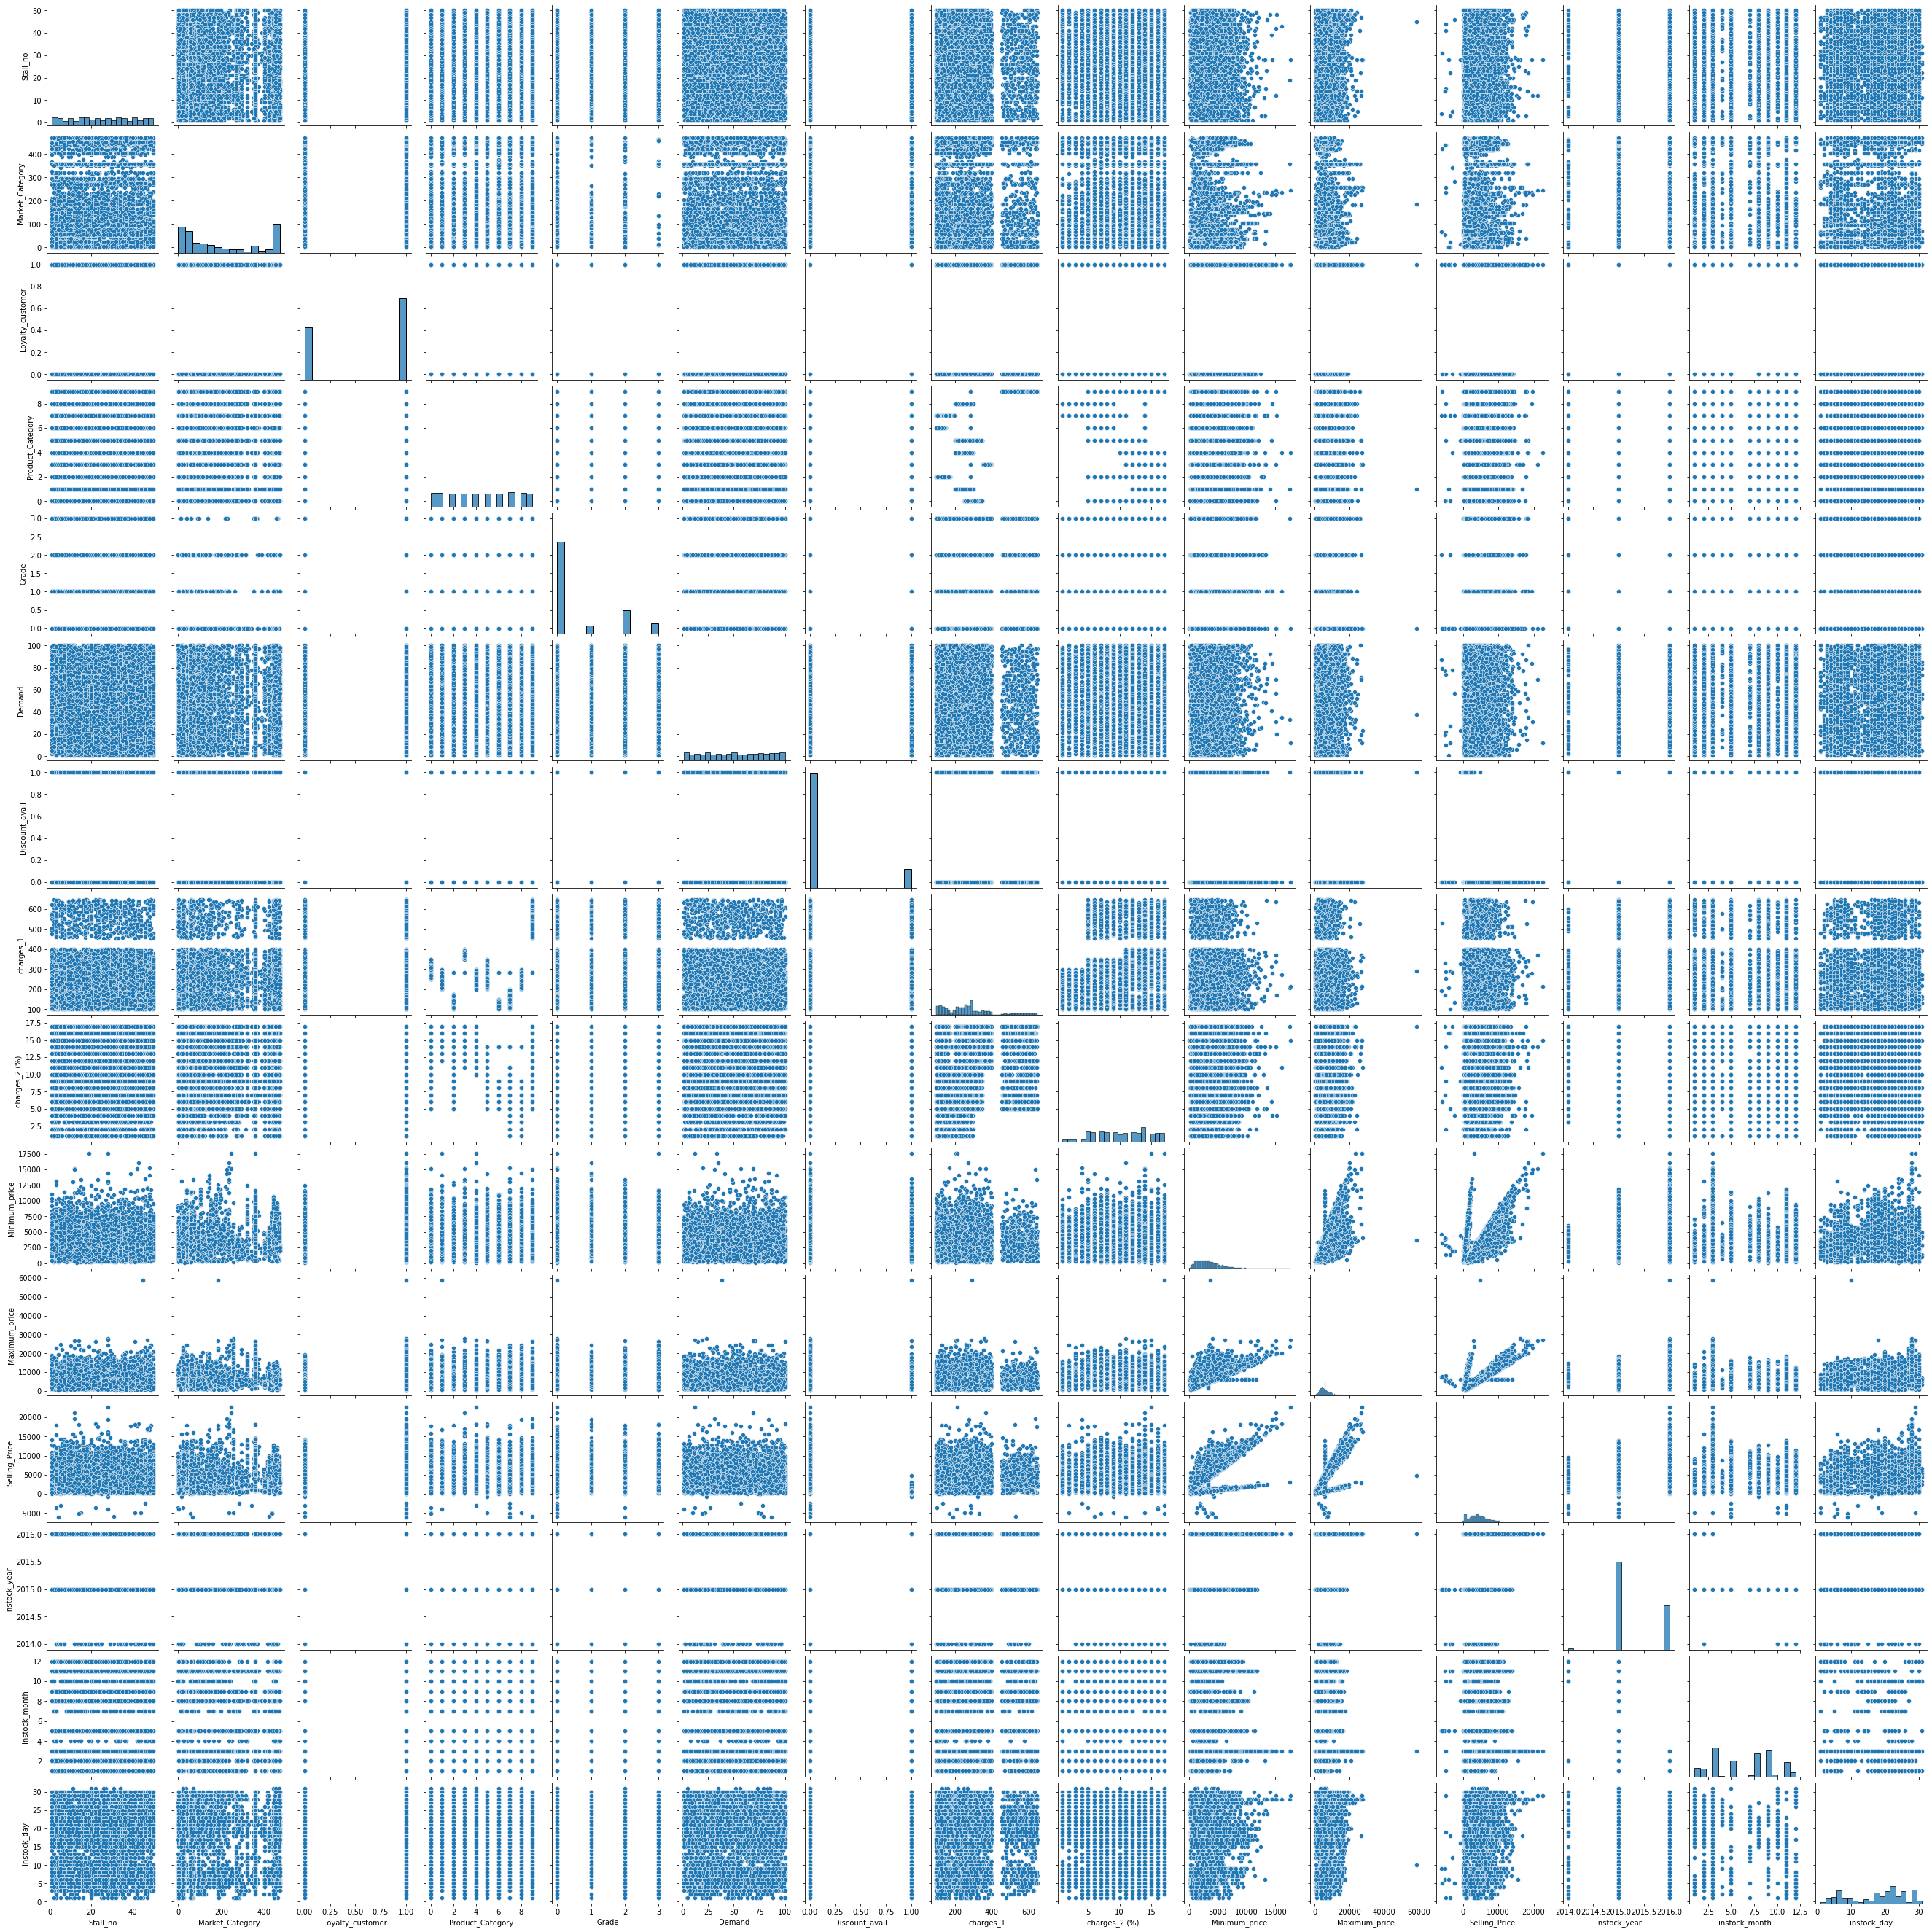

In [33]:
sns.pairplot(train)

In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30,10)

<AxesSubplot:>

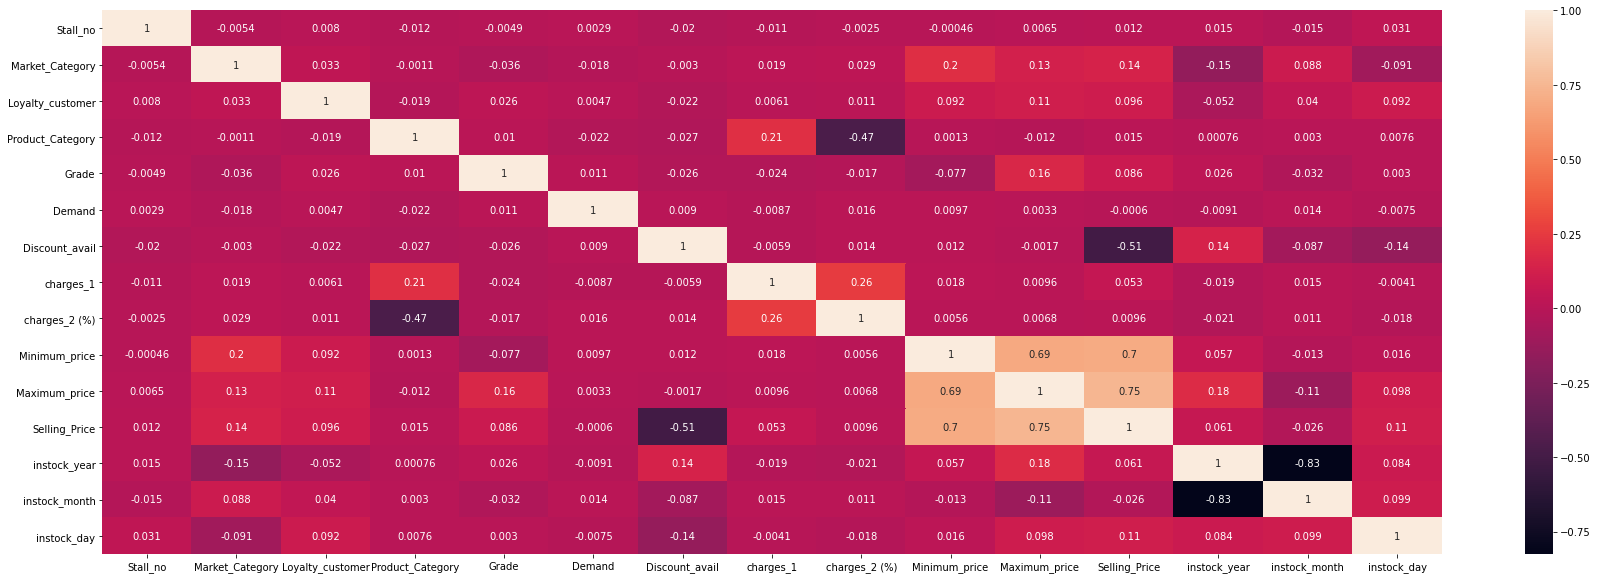

In [35]:
sns.heatmap(train_num.corr(), annot = True)

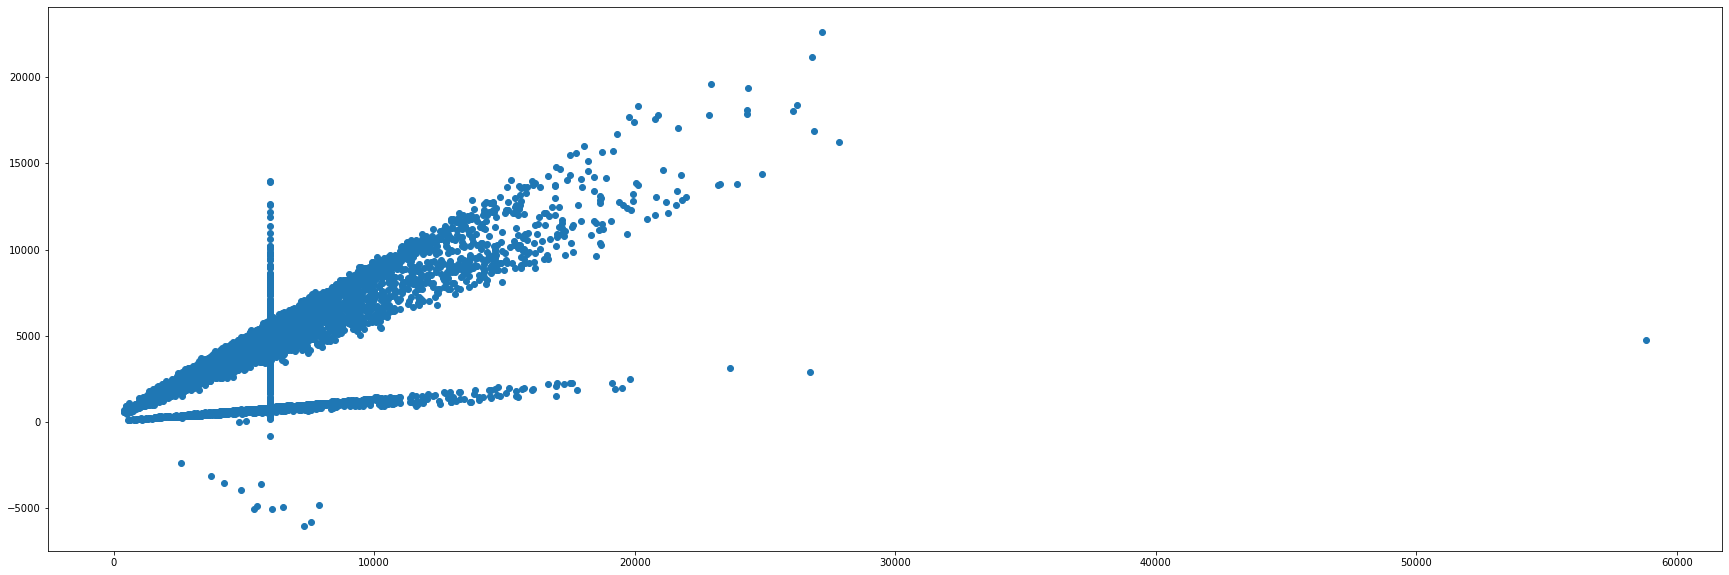

In [36]:
plt.scatter(train_num['Maximum_price'], train_num['Selling_Price'])

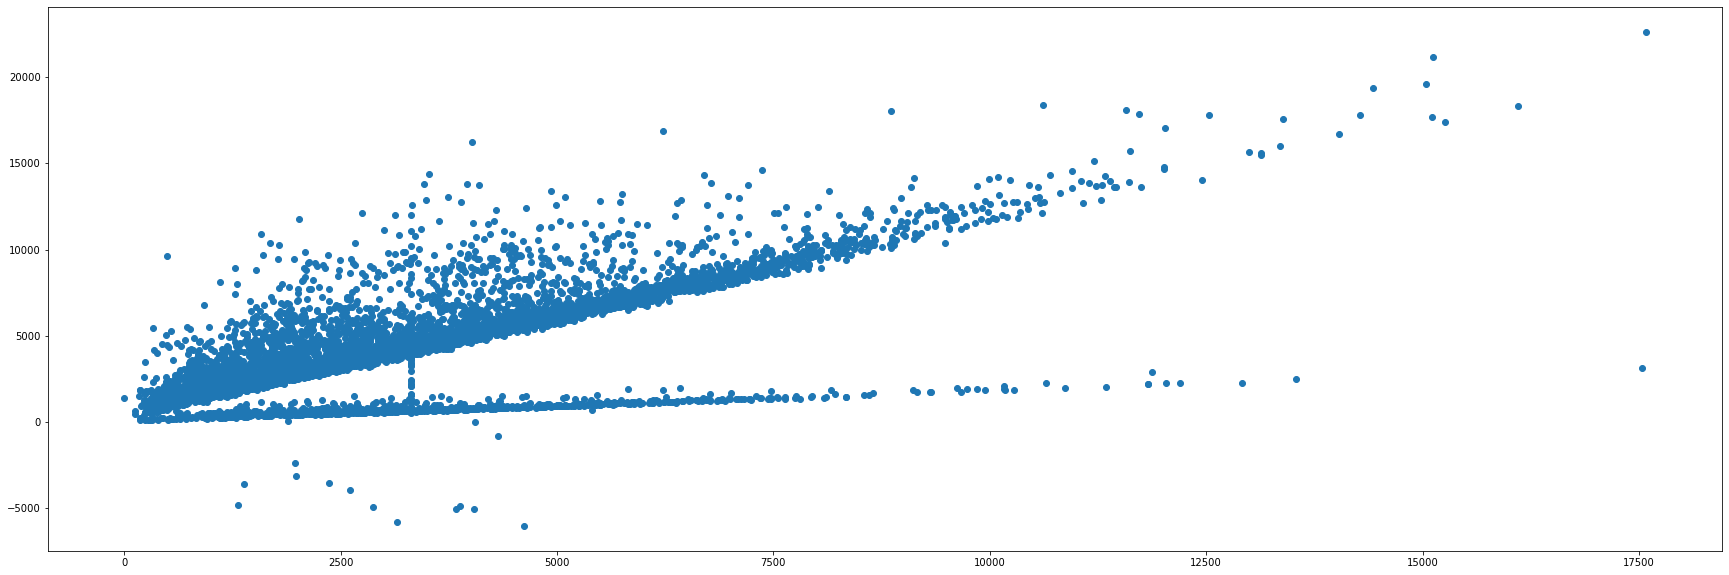

In [37]:
plt.scatter(train_num['Minimum_price'], train_num['Selling_Price'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_avail', ylabel='count'>

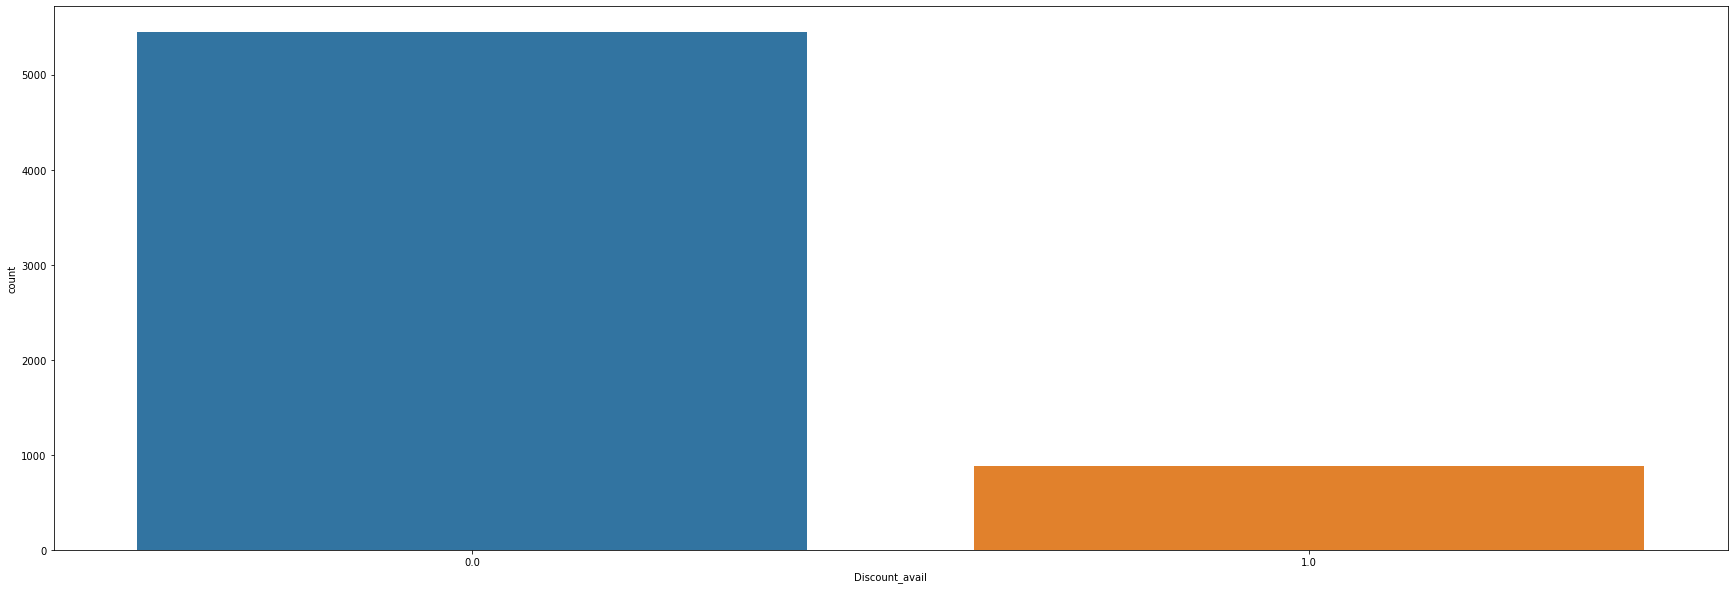

In [38]:
sns.countplot(train_num['Discount_avail'])

<BarContainer object of 6327 artists>

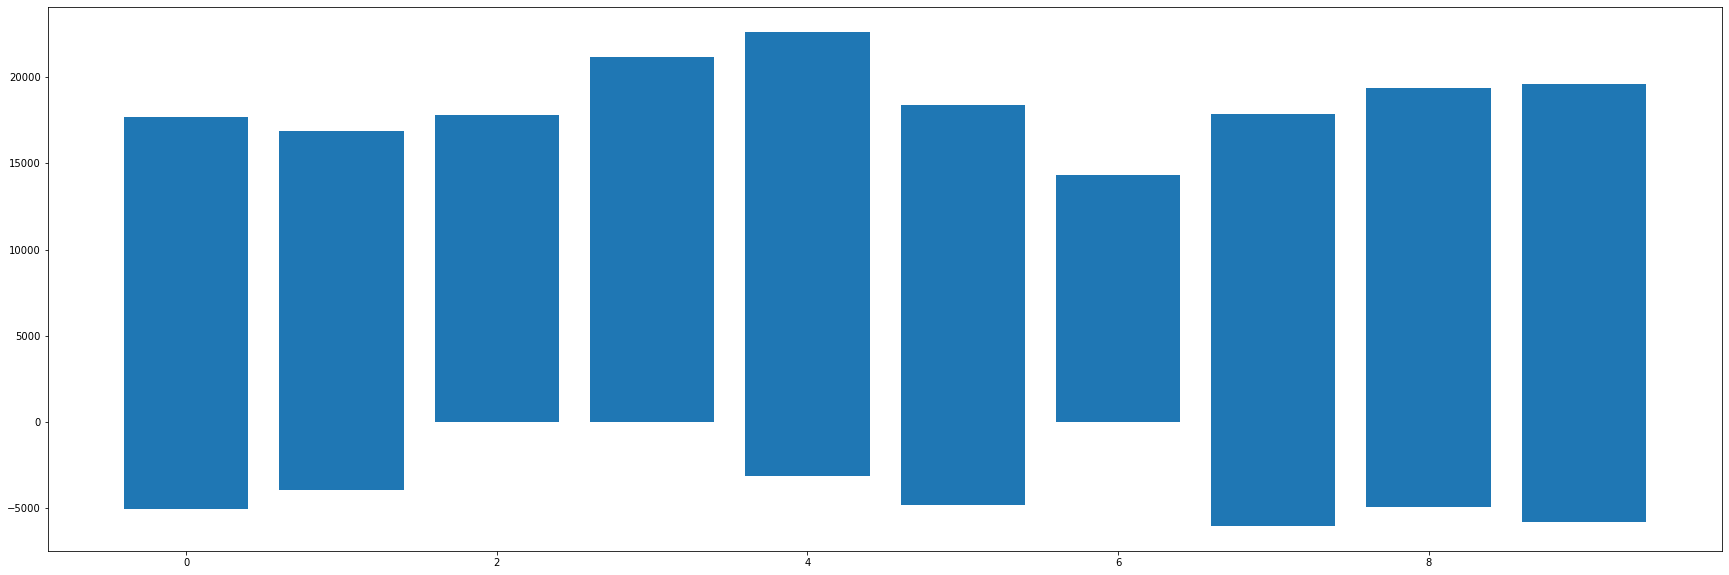

In [39]:
plt.bar(train_num['Product_Category'], train_num['Selling_Price'])

In [40]:
train_num_pre = train_num.drop(columns = ['Selling_Price'])

In [41]:
scale1 = StandardScaler()
train_pre = pd.DataFrame(scale1.fit_transform(train_num_pre), columns = train_num_pre.columns )

In [42]:
train_pre[0:2]

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day
0,0.816172,-1.157415,0.798918,-0.525404,0.347120,0.587090,-0.402207,0.903222,0.168133,-0.251261,-0.470245,-0.661351,0.482422,0.509730
1,0.885978,-1.028226,0.798918,-0.525404,-0.628114,0.002662,-0.402207,1.074507,0.400653,1.811843,1.089031,1.394849,-1.019686,1.128459


In [43]:
x = train_pre
y = train['Selling_Price']

In [44]:
model1 = LinearRegression()
model1.fit(x,y)
y1 = model1.predict(x)

In [45]:
model2 = Ridge(random_state = 9)
model2.fit(x,y)
y2 = model2.predict(x)

In [46]:
model3 = Lasso(random_state = 9)
model3.fit(x,y)
y3 = model3.predict(x)

In [47]:
model4 = ElasticNet(l1_ratio = 0.9, random_state = 9)
model4.fit(x,y)
y4 = model4.predict(x)

In [48]:
model5 = KNeighborsRegressor(n_neighbors = 1)
model5.fit(x,y)
y5 = model5.predict(x)

In [49]:
def rmsle(y_pred, y_test) :
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))

In [50]:
rmsle(y1, y), rmsle(y2, y), rmsle(y3, y), rmsle(y4, y), rmsle(y5, y)

<ipython-input-49-4d0160355eb9>:3: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.3477904202530881,
 0.34616626668047834,
 0.3495613825550738,
 0.3471487332022266,
 0.0)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [52]:
test.duplicated().sum()

0

In [53]:
test.isna().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [54]:
test.drop(columns = 'Customer_name', inplace = True)

In [55]:
test['Minimum_price'].mode()

0    2779.0
dtype: float64

In [56]:
test['Stall_no'].fillna(test['Stall_no'].mode()[0], inplace = True)

In [57]:
test['charges_1'].fillna(test['charges_1'].mode()[0], inplace = True)

In [58]:
test['charges_2 (%)'].fillna(test['charges_2 (%)'].mode()[0], inplace = True)

In [59]:
test['Minimum_price'].fillna(test['Minimum_price'].mode()[0], inplace = True)

In [60]:
test['instock_date'] = pd.to_datetime(test['instock_date'])

In [61]:
test['instock_year'] = test['instock_date'].dt.year

In [62]:
test['instock_month'] = test['instock_date'].dt.month

In [63]:
test['instock_day'] = test['instock_date'].dt.day

In [64]:
test.drop(columns = ['instock_date'], inplace = True)

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3430 non-null   float64
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   object 
 4   Product_Category  3430 non-null   object 
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3430 non-null   float64
 9   charges_2 (%)     3430 non-null   float64
 10  Minimum_price     3430 non-null   float64
 11  Maximum_price     3430 non-null   int64  
 12  instock_year      3430 non-null   int64  
 13  instock_month     3430 non-null   int64  
 14  instock_day       3430 non-null   int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 402.1+ KB


In [66]:
test['Product_Category'] = encode.fit_transform(test['Product_Category'])

In [67]:
test['Loyalty_customer'] = encode.fit_transform(test['Loyalty_customer'])

In [68]:
test_num = test.select_dtypes(include = np.number)
test_num[0:2]

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day
0,39.0,205,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1,13
1,49.0,3,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8,23


In [69]:
test_pre = pd.DataFrame(scale1.fit_transform(test_num), columns = test_num.columns )

In [70]:
Y1 = model1.predict(test_pre)

In [71]:
Y2 = model2.predict(test_pre)

In [72]:
Y3 = model3.predict(test_pre)

In [73]:
Y4 = model4.predict(test_pre)

In [74]:
Y5 = model5.predict(test_pre)

In [75]:
submission[0:2]

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968


In [76]:
sub = test_c
sub.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [77]:
sub.drop(columns = ['Stall_no', 'instock_date', 'Market_Category', 'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price'], inplace = True)

In [78]:
sub['Selling_Price'] = 0.0

In [79]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_id     3430 non-null   object 
 1   Selling_Price  3430 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [80]:
sub['Selling_Price'] = np.abs(Y1)
sub.to_csv("hhp1.csv", index = False)

In [81]:

sub['Selling_Price'] = np.abs(Y2)
sub.to_csv("hhp2.csv", index = False)

In [82]:
sub['Selling_Price'] = np.abs(Y3)
sub.to_csv("hhp3.csv", index = False)

In [83]:
sub['Selling_Price'] = np.abs(Y4)
sub.to_csv("hhp4.csv", index = False)

In [84]:
sub['Selling_Price'] = np.abs(Y5)
sub.to_csv("hhp5.csv", index = False)